In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy.linalg as la 
#base e dados da base
columns = ["loc", "v(g)", "ev(g)","iv(g)", "n", "v", "l", "d","i", "e", "b", "t", "lOCode",\
                                      "loComment", "lOBlank", "locCodeAndComment", "uniq_Op", "uniq_Opnd", \
                                      "total_Op", "total_Opnd", "branchCount", "defects"]
df = pd.read_csv("../base2.csv", names=columns)
size = df.shape[1]
# Samples for training
tam = (size - 1)
feature_data = df.iloc[:, :tam]
label_data = df.iloc[:, -1]

x = feature_data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=df.columns[:tam])
data = pd.concat([data, label_data], axis=1)

In [195]:
all_pattern_mean = data.mean()[:tam]
classes = data.iloc[:, -1].unique()

# Dispersão entre classes
sb = 0

# Dispersão intra classes
sw = np.zeros((tam, tam))
for l in classes:
    class_patterns = data[data.iloc[:, -1] == l].iloc[:, :tam]
    sb = np.add(class_patterns.cov(), sb)

    # Within class covariance 
    sw = np.add((class_patterns.iloc[:, :tam].cov()), sw)
print(sw.shape)
sb.shape


(21, 21)


(21, 21)

In [201]:
a = np.dot(sw.T, sb)
eigenvalues, eigenvectors = la.eig(a)

k = 10
eigenvalues_indices = np.argsort(eigenvalues)[::-1]
a = eigenvalues_indices[:k]
b = eigenvalues_indices[-1:]
eigenvalues_indices = np.concatenate([a,b])
print(eigenvalues_indices)
eigenvalues

[ 0  1  2  3  4  5  6  7  8  9 20]


array([ 1.35968205e-01,  3.83438103e-03,  2.48589202e-03,  1.02414110e-03,
        5.50401379e-04,  4.08875467e-04,  1.25411334e-04,  1.03650702e-05,
        8.48116637e-06,  4.59823149e-06,  1.86407114e-06,  1.27260563e-06,
        9.95957807e-07,  7.15938160e-07,  2.31358933e-07,  8.00479949e-08,
        2.52428709e-08,  1.28020000e-09,  5.19805449e-10,  5.88899569e-12,
       -4.48349905e-19])

In [203]:
new_data = np.matrix(eigenvectors[eigenvalues_indices])*np.matrix(x_scaled.T)
df_new = pd.DataFrame(new_data.T, columns=df.columns[eigenvalues_indices])
df_new

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,branchCount
0,-0.023366,0.020768,-0.044331,-0.005267,-0.106129,-0.024533,-0.007335,-0.081697,0.036438,0.096199,0.070378
1,0.012561,-0.022477,-0.055657,0.002819,-0.031568,-0.008294,-0.031781,-0.024652,-0.006648,0.036020,0.003257
2,0.022723,-0.036561,-0.070718,-0.002030,-0.017666,-0.005586,-0.056675,-0.006941,-0.018886,0.031707,-0.019574
3,-0.012716,0.004827,-0.046313,0.001860,-0.076382,-0.023526,-0.014662,-0.059377,0.010164,0.066122,0.052338
4,-0.014990,-0.070836,-0.164071,0.018941,-0.226832,-0.069160,0.065359,-0.188448,-0.017202,0.113349,0.194648
5,-0.125860,-0.129098,-0.449829,-0.000167,-0.651826,-0.157630,0.274242,-0.245101,-0.031712,0.245828,0.438791
6,-0.062998,-0.042890,-0.224485,-0.040671,-0.326795,-0.004026,0.083692,-0.292386,-0.107047,0.277206,0.313442
7,-0.196263,0.144327,-0.182081,-0.220659,-0.612659,-0.059702,0.098097,-0.584947,-0.119740,0.338985,0.324357
8,-0.408188,0.058866,-0.509717,-0.300444,-1.084492,-0.074884,0.329112,-0.909577,-0.505394,0.496710,0.707135
9,-0.105543,-0.023354,-0.172387,-0.090914,-0.311121,-0.063378,0.050075,-0.297221,-0.143111,0.190294,0.200048


In [205]:
# Training model
model = KNeighborsClassifier(n_neighbors=1)

# Slip data mode
cv = StratifiedKFold(n_splits=5)

#training data
tam = df_new.shape[1] - 1
feature_new_data = df_new.iloc[:, :tam]

# Executing the train and test process
scores = cross_val_score(model, feature_new_data, label_data, cv=cv)

print("Model's acuracy")
print(scores)


res = 0
for i in scores:
    res += i
res/5

Model's acuracy
[0.81818182 0.69318182 0.75862069 0.84883721 0.81395349]


0.7865550047386456

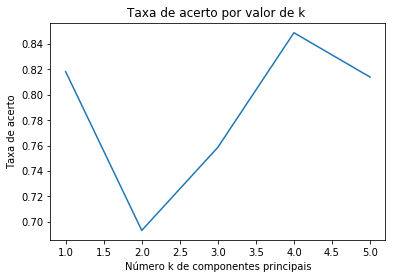

In [209]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot([1,2,3, 4, 5], scores)
# title = "(knn com peso)" if weighted else "(Knn sem peso)"
plt.title("Taxa de acerto por valor de k ")# + title)
plt.xlabel('Número k de componentes principais')
plt.ylabel("Taxa de acerto")

plt.show()